In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


IMPORTING DATA SET


In [2]:
url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url)
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


DEALING WITH MISSING DATA

In [3]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [4]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
#to get the percentage of missing data in each column
(fuel_data.isnull().sum()/len(fuel_data))*100

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [6]:
# lets see the members of the 'fuel_unit' (which is the only column with missing value) column and and their population
fuel_data['fuel_unit'].value_counts() #prints out the counts of every unique member of a categorical column

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [7]:
#we see that 'mcf' has higher count of values, so we can fill up the missing values with this and it will have little or no effect on our data distribution
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna('mcf') #this fills up the rows with missing values
(fuel_data.isnull().sum()/len(fuel_data))*100 #now to check again the percentages of missing data

record_id                       0.0
utility_id_ferc1                0.0
report_year                     0.0
plant_name_ferc1                0.0
fuel_type_code_pudl             0.0
fuel_unit                       0.0
fuel_qty_burned                 0.0
fuel_mmbtu_per_unit             0.0
fuel_cost_per_unit_burned       0.0
fuel_cost_per_unit_delivered    0.0
fuel_cost_per_mmbtu             0.0
dtype: float64

GROUPING DATA

In [8]:
#we can see the quatitiy of fuel burned per fuel type by using the groupby method and summing the values
fu = fuel_data[['fuel_type_code_pudl','fuel_cost_per_unit_burned']].groupby('fuel_cost_per_unit_burned').sum()
fu

,fuel_type_code_pudl
fuel_cost_per_unit_burned,
-276.080,waste
-174.670,waste
-123.310,waste
-119.040,other
-85.760,waste
...,...
65137.588,nuclear
69785.215,nuclear
80459.000,oil


In [9]:
# we can also group by the year, to see the years with the highest fuel usage
usage_year = fuel_data[['report_year','fuel_cost_per_unit_delivered']].groupby('report_year').sum()
usage_year

,fuel_cost_per_unit_delivered
report_year,
1994,7.859053e+04
1995,3.931506e+04
1996,1.000602e+07
1997,1.218738e+07
1998,3.178799e+05
1999,2.682921e+04
2000,1.352903e+06
2001,8.142834e+04
2002,5.735121e+04


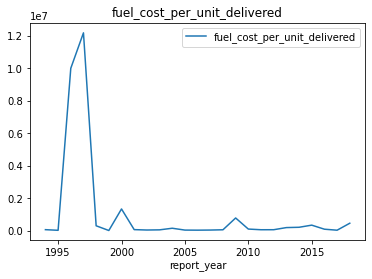

In [10]:
#we could also do a simple plot to veiw the amount of fuel burnt per year
usage_year.plot()
sn.set_style('darkgrid')
plt.title('fuel_cost_per_unit_delivered')
plt.show()

In [11]:
# you could also do a double groupby
fuel_data[['fuel_type_code_pudl','report_year','fuel_qty_burned']].groupby(['fuel_type_code_pudl','report_year']).sum()

fuel_qty_burned
fuel_type_code_pudl report_year                 
coal                1994            7.172082e+08
                    1995            1.257398e+09
                    1996            6.988514e+08
                    1997            8.169024e+08
                    1998            8.982095e+08
...                                          ...
waste               2014            3.607257e+06
                    2015            3.737472e+06
                    2016            3.782403e+06
                    2017            3.534230e+06
                    2018            3.296373e+06

[148 rows x 1 columns]

MERGING DATA


In [12]:
# Here we are going to consider 'concat' and 'merge' methods
df1 = fuel_data.iloc[:1900]
df2 = fuel_data.iloc[1900:]

In [13]:
# 'merge' method
merged_df = pd.merge(df1,df2, how = 'outer')
merged_df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29523 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.7+ MB


In [15]:
len(df1), len(df2), len(merged_df)

(1900, 27623, 29523)

In [16]:
# To demonstrate concat we need to creat another dataframe. Lets create a dataframe from that has the difference between the fuel cost per unit burned
# and fuel cost per unit delivered
excess_fuel_cost = pd.DataFrame(fuel_data['fuel_cost_per_unit_delivered'] - fuel_data['fuel_cost_per_unit_burned'], columns = ['excess_fuel_cost'])
#Now using the concat method
fuel_data = pd.concat([fuel_data,excess_fuel_cost], axis = 1)
fuel_data.head(3)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,excess_fuel_cost
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,-0.06
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,-0.05
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,-1.60


In [17]:
# Strong -ve correlations
fuel_data.corr()['fuel_cost_per_unit_burned'].sort_values().head(10)

utility_id_ferc1               -0.037863
excess_fuel_cost               -0.030484
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64